<a href="https://colab.research.google.com/github/Maan2911/Z-Alizadeh-sani-data-set/blob/main/INT_247_Project_Z_Alizadeh_sani_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
path ="/content/drive/MyDrive/Z-Alizadeh sani dataset.csv"
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of      Age  Weight  Length    Sex  ...  EF-TTE  Region RWMA     VHD    Cath
0     53      90     175   Male  ...      50            0       N     Cad
1     67      70     157  Fmale  ...      40            4       N     Cad
2     54      54     164   Male  ...      40            2    mild     Cad
3     66      67     158  Fmale  ...      55            0  Severe  Normal
4     50      87     153  Fmale  ...      50            0  Severe  Normal
..   ...     ...     ...    ...  ...     ...          ...     ...     ...
298   58      84     168   Male  ...      45            0       N     Cad
299   55      64     152  Fmale  ...      40            0    mild  Normal
300   48      77     160  Fmale  ...      55            0       N  Normal
301   57      90     159  Fmale  ...      55            0       N  Normal
302   56      85     170  Fmale  ...      55            0       N     Cad

[303 rows x 56 columns]>

In [ ]:
df=df.dropna() 
np.any(df.isnull()) == True 

False

In [ ]:
df1=df[['Age','Weight','Length','BMI','BP','PR','FBS','CR','TG','LDL','HDL','BUN','ESR','HB','K','Na','WBC','Lymph','Neut','PLT','EF-TTE','Cath']]
df2=df.drop(columns=['Age','Weight','Length','BMI','BP','PR','FBS','CR','TG','LDL','HDL','BUN','ESR','HB','K','Na','WBC','Lymph','Neut','PLT','EF-TTE'])

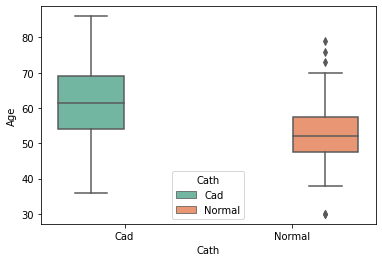

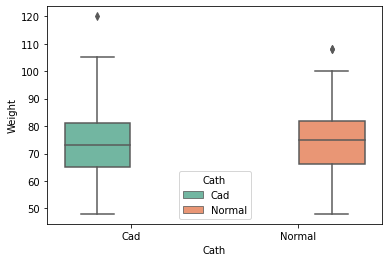

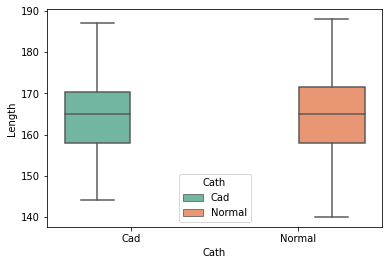

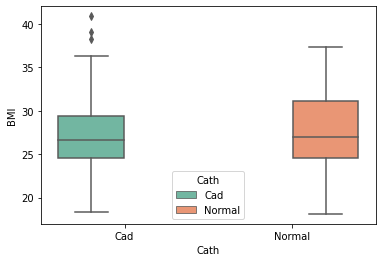

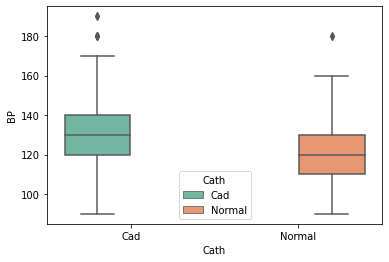

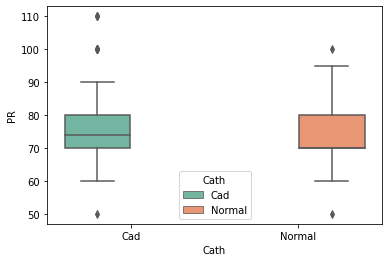

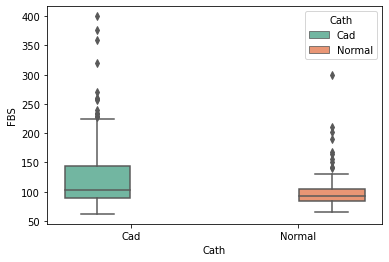

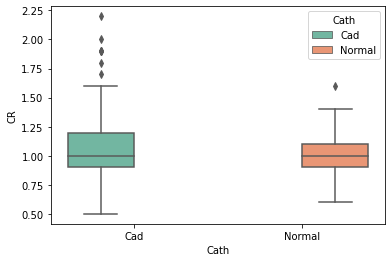

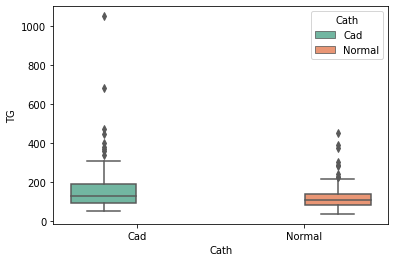

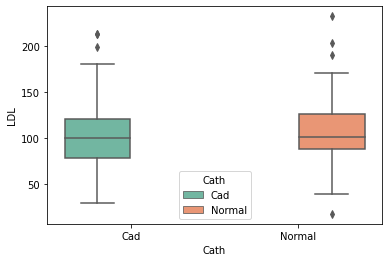

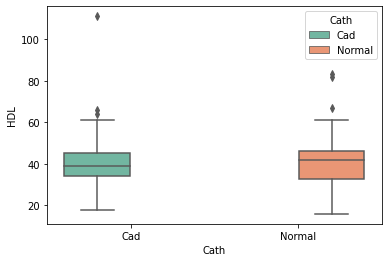

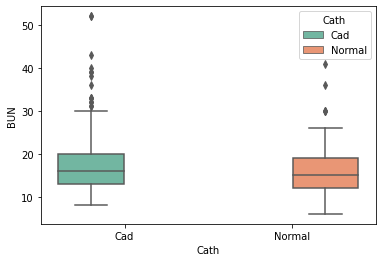

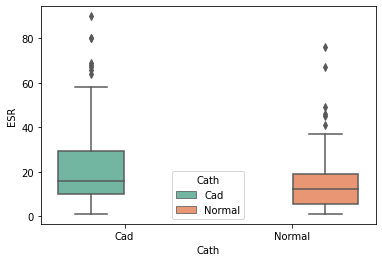

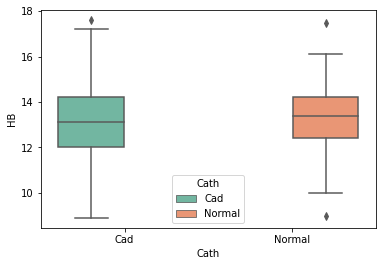

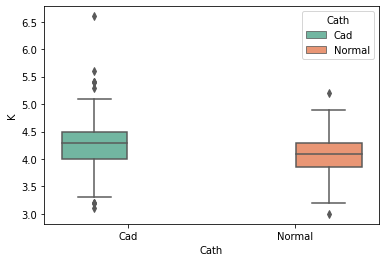

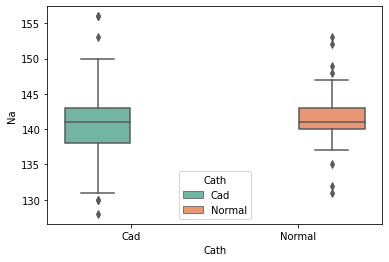

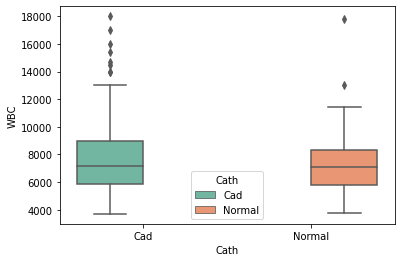

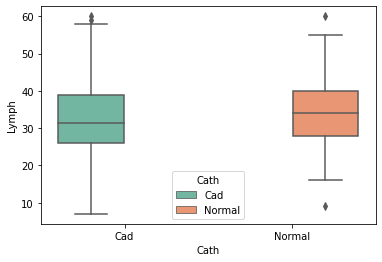

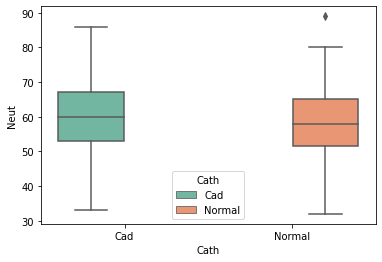

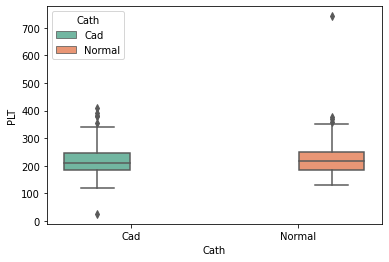

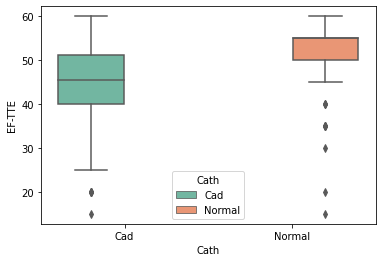

In [ ]:
for i in range(0,21):
    sns.boxplot(x='Cath',y=df1.iloc[:, i],hue='Cath',data=df1,palette='Set2')
    plt.show()

In [ ]:
df1.head(5)

,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Cath
0,53,90,175,29.387755,110,80,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,Cad
1,67,70,157,28.398718,140,80,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,Cad
2,54,54,164,20.077335,100,100,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,Cad
3,66,67,158,26.838648,100,80,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,Normal
4,50,87,153,37.165193,110,80,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,Normal


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

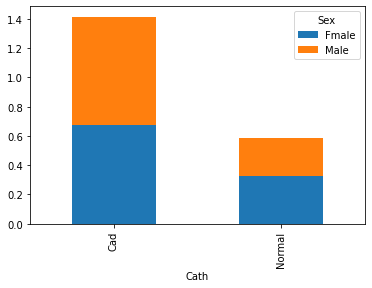

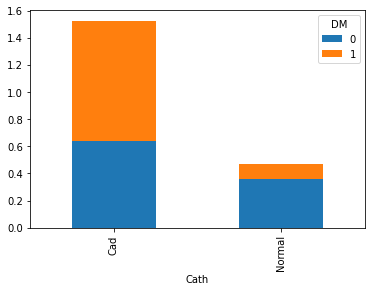

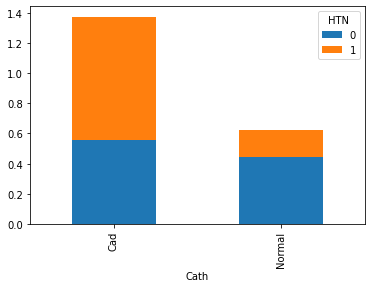

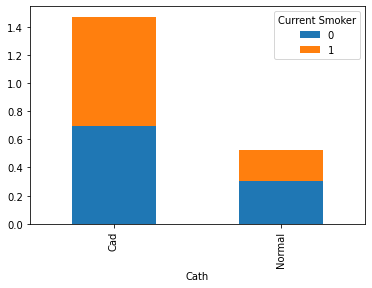

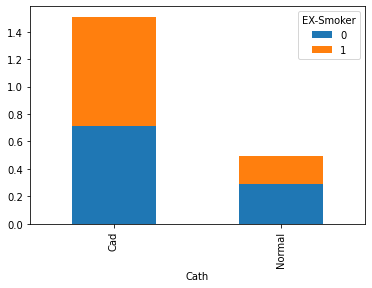

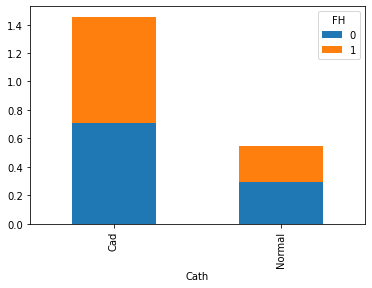

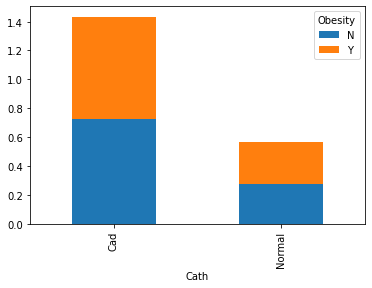

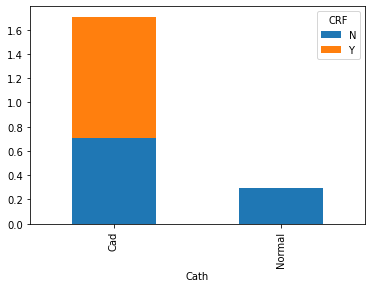

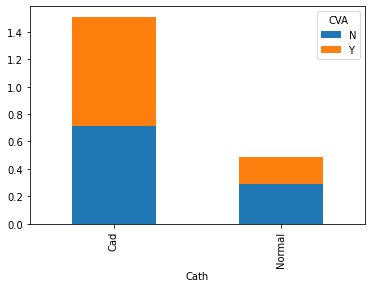

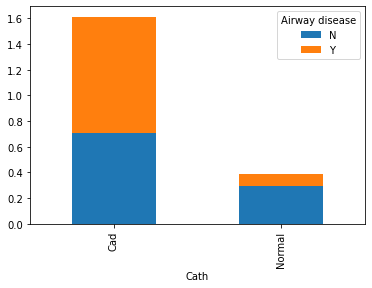

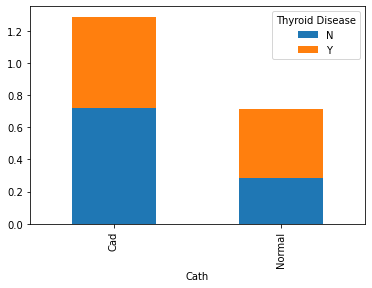

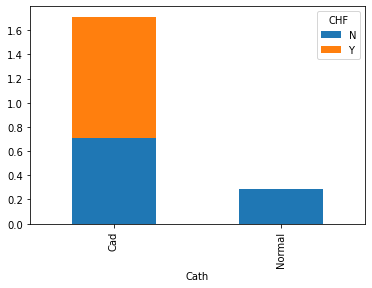

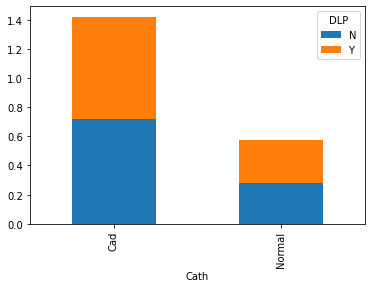

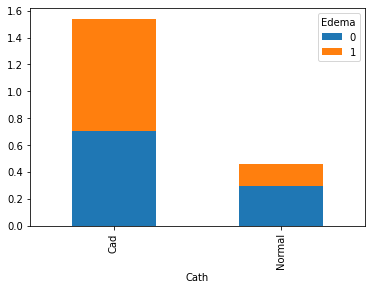

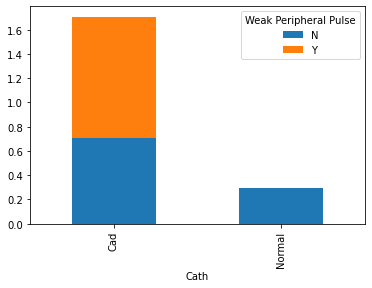

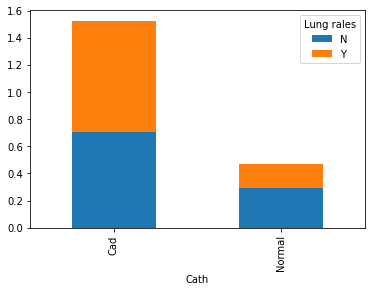

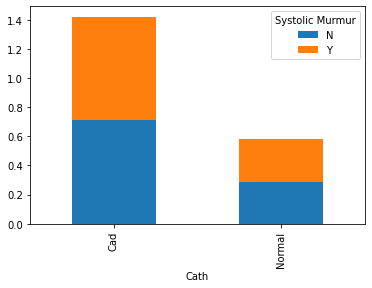

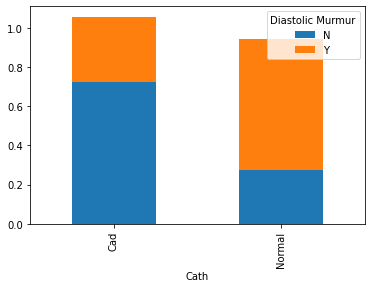

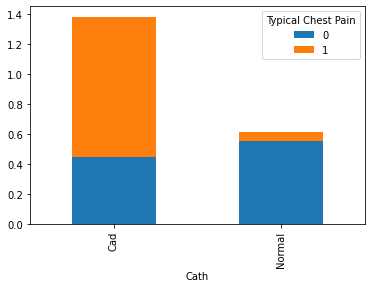

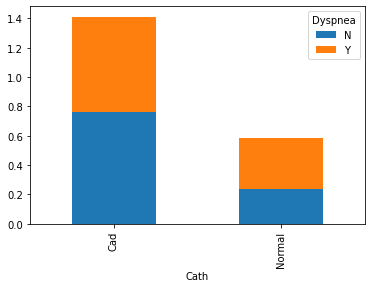

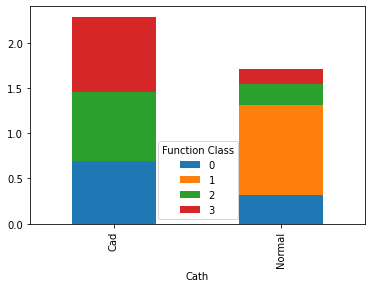

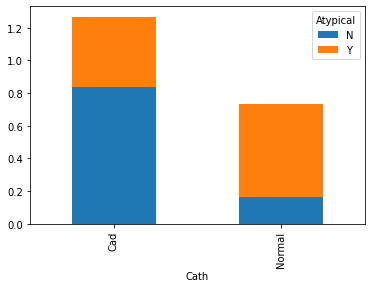

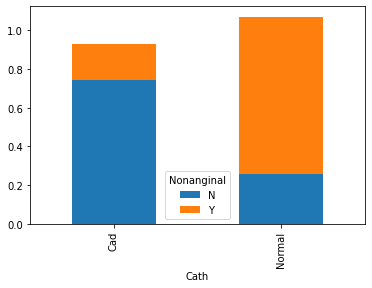

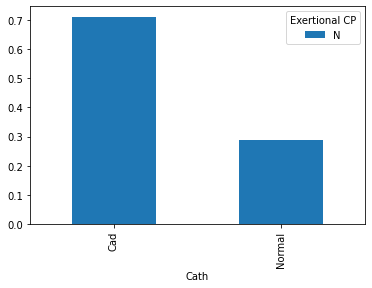

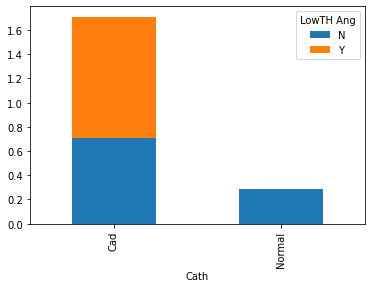

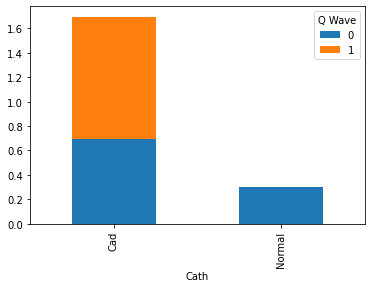

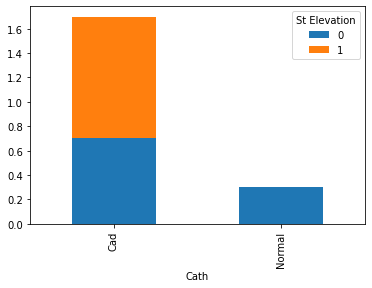

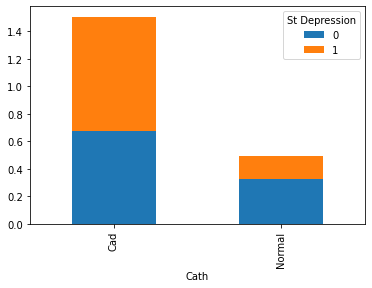

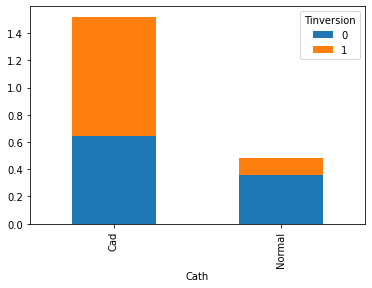

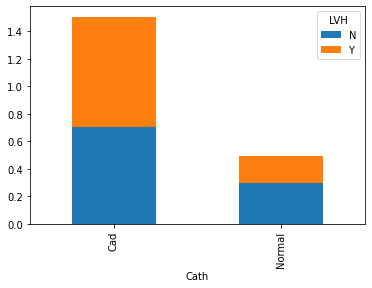

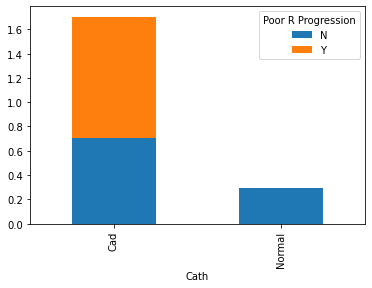

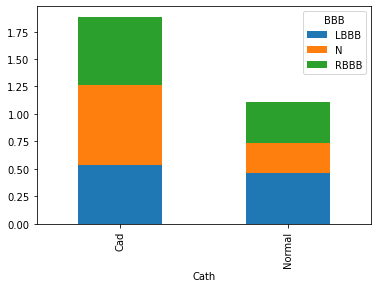

In [ ]:
for i in range (32):
    k1=pd.crosstab(df2["Cath"],df2.iloc[:,i], normalize='columns')
    k1.plot.bar(stacked=True)

In [ ]:
from scipy import stats
for i in range (32):
    t=pd.crosstab(index=df2.iloc[:,i], columns=df2["Cath"])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(t)
    print(p_val)

0.29912748032994074
2.0151216696088066e-05
1.0613994174234381e-06
0.2614282408056519
0.7918503571878034
0.6556712220589083
0.8003392662047962
0.2650767356538259
0.9488531854380938
0.26022618689831134
0.6786883219536877
0.6374314624875783
0.9284012543545925
0.5381363640924626
0.3510272762085389
0.6548881235150674
0.9194904732910609
0.029186841075014923
1.1208757414611353e-20
0.04019906733759862
0.13937570520798603
1.2274095302389614e-12
7.162622500519449e-06
1.0
0.907300247152006
0.02009839902944511
0.03325139239822218
0.018073179685046792
6.738843479506193e-05
0.5251252423159039
0.11902430717636353
0.30322071572953524


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [ ]:
df.replace(('Y', 'N'), (1, 0), inplace=True)

In [ ]:
for i in range(0,303):
    if df.at[i,'Cath']=='Cad':
         df.at[i,'Cath'] = 0
    else:
        df.at[i,'Cath'] = 1
df['Cath']=df['Cath'].astype(str).astype(int)

In [ ]:
for i in range(0,303):
    if df.at[i,'Sex']=='Male':
         df.at[i,'Sex'] = 0
    else:
        df.at[i,'Sex'] = 1
df['Sex']=df['Sex'].astype(str).astype(int)

In [ ]:
for i in range(0,303):
    if df.at[i,'VHD']=='mild':
         df.at[i,'VHD'] = 1
    elif df.at[i,'VHD']=='Moderate':
        df.at[i,'VHD'] = 2
    elif df.at[i,'VHD']=='Severe':
        df.at[i,'VHD'] = 3
df['VHD']=df['VHD'].astype(str).astype(int)

In [ ]:
df[df.columns[:]].corr()['Cath'][:-1]

Age                     -0.357247
Weight                   0.066833
Length                  -0.001024
Sex                      0.067041
BMI                      0.078189
DM                      -0.252897
HTN                     -0.287761
Current Smoker          -0.073504
EX-Smoker               -0.035578
FH                      -0.035605
Obesity                  0.022461
CRF                     -0.090205
CVA                     -0.024946
Airway disease          -0.084179
Thyroid Disease          0.048077
CHF                     -0.036520
DLP                      0.012718
BP                      -0.237762
PR                      -0.168366
Edema                   -0.054069
Weak Peripheral Pulse   -0.082207
Lung rales              -0.045179
Systolic Murmur          0.004856
Diastolic Murmur         0.146777
Typical Chest Pain      -0.542967
Dyspnea                  0.125211
Function Class          -0.097087
Atypical                 0.415922
Nonanginal               0.274184
Exertional CP 

In [ ]:
abs(df[df.columns[:]].corr()['Cath'][:-1])>0.2

Age                       True
Weight                   False
Length                   False
Sex                      False
BMI                      False
DM                        True
HTN                       True
Current Smoker           False
EX-Smoker                False
FH                       False
Obesity                  False
CRF                      False
CVA                      False
Airway disease           False
Thyroid Disease          False
CHF                      False
DLP                      False
BP                        True
PR                       False
Edema                    False
Weak Peripheral Pulse    False
Lung rales               False
Systolic Murmur          False
Diastolic Murmur         False
Typical Chest Pain        True
Dyspnea                  False
Function Class           False
Atypical                  True
Nonanginal                True
Exertional CP            False
LowTH Ang                False
Q Wave                   False
St Eleva

In [ ]:
df10=df[["Age","DM","HTN","BP","Typical Chest Pain","FBS","Nonanginal","Tinversion","EF-TTE","Region RWMA","Cath"]]

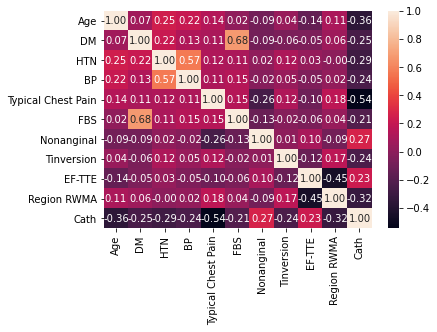

In [ ]:
sns.heatmap(df10.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
df20=df[["Age","DM","HTN","BP","Typical Chest Pain","FBS","Nonanginal","Tinversion","EF-TTE","Region RWMA","VHD","K","ESR","PR","Q Wave","Diastolic Murmur","St Depression","TG","St Elevation", "Cath"]]

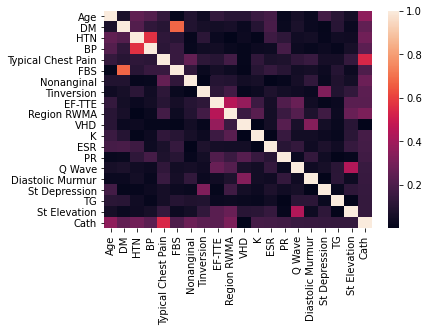

In [ ]:
Var_Corr = df20.corr()
sns.heatmap(abs(Var_Corr), xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

In [ ]:
y=df['Cath']
X=df.drop(columns=['Cath'])

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(242, 55) (242,)
(61, 55) (61,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1, 26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(X_test, y_pred))
accuracy1= max(scores)
print(accuracy1)

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(y_test, y_pred2)

from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

In [ ]:
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = roc_curve(y_test, y_pred2) 
from sklearn.metrics import auc  
print(auc(fpr, tpr))
from sklearn.metrics import log_loss
print(log_loss(y_test, y_pred2))

In [ ]:
from sklearn.tree import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
accuracy3=accuracy_score(y_test, y_pred3)

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3) 
print(auc(fpr, tpr))  
print(log_loss(y_test, y_pred3))

In [ ]:
from collections import OrderedDict
c=OrderedDict([('knn',[accuracy1]),('logestic',[accuracy2]),('desiciontree',[accuracy3])])
print(pd.DataFrame(c))